In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
user_df = pd.read_csv('./data/user_profile.csv')

In [4]:
user_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [5]:
user_df.shape

(33901, 15)

In [6]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [7]:
feature_names = list(user_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [8]:
scaler = StandardScaler()
user_df[feature_names] = scaler.fit_transform(user_df[feature_names])

In [9]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04
mean,1.064064e+06,-3.353495e-17,-5.700942e-17,-3.521170e-17,-7.671120e-17,3.353495e-18,3.688845e-17,-1.509073e-17,-1.676748e-17,6.706990e-17,-6.874665e-17,4.233788e-17,1.383317e-17,5.051202e-17,-5.281755e-17
std,4.972578e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
25%,6.813480e+05,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
50%,1.043907e+06,-3.308757e-01,-1.168130e-01,-6.005256e-01,-1.312380e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-3.990622e-01,-3.811535e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
75%,1.451159e+06,4.573712e-01,5.928781e-01,1.803581e-01,4.990056e-01,-4.247674e-01,-1.038556e-02,-2.429612e-02,7.480294e-01,1.731609e-01,-4.387873e-01,-4.343370e-01,1.694715e-01,-2.316212e-01,5.194189e-01
max,2.103039e+06,7.551593e+00,3.431642e+00,9.290667e+00,9.322416e+00,5.953517e+00,7.775190e+00,4.115884e+01,5.145214e+00,6.824934e+00,5.247500e+00,7.249771e+00,1.200053e+01,1.076995e+01,5.646161e+00


In [10]:
user = user_df.iloc[-1,1:]

In [11]:
features = user_df.loc[:,user_df.columns!='user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116
3,-0.462250,-0.826504,-0.600526,-0.341319,-0.424767,-0.659184,-0.024296,-0.972608,-0.381153,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
4,0.063248,-0.826504,-0.600526,0.078843,-0.424767,-0.659184,-0.024296,-0.972608,0.173161,-0.438787,0.419453,-0.526473,-0.231621,-0.505930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,-0.330876,-0.116813,0.180358,0.499006,-0.424767,-0.659184,-0.024296,0.174484,-0.658311,-0.438787,2.127032,0.865416,-0.231621,1.032093
33897,-0.724999,-0.826504,-0.079936,-0.761482,-0.424767,-0.659184,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
33898,-0.330876,0.592878,0.961242,-0.761482,-0.424767,2.368540,-0.024296,0.748029,-0.658311,-0.438787,0.846348,-0.526473,-0.231621,-0.505930
33899,-0.724999,-0.826504,-0.600526,-0.761482,-0.424767,-0.226652,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930


In [12]:
user_ids = user_df.loc[:,user_df.columns=='user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


In [13]:
s = []
for k in range(1,30):
    km = KMeans(n_init='auto',n_clusters=k)
    km.fit_predict(features)
    s.append(km.inertia_)


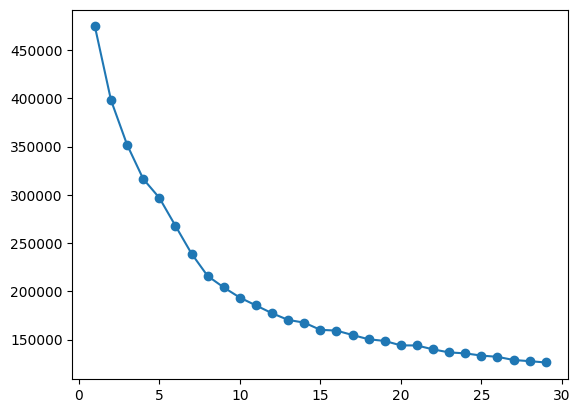

In [14]:
plt.plot(list(range(1,30)),s)
plt.scatter(list(range(1,30)),s)

In [15]:
cluster_labels = [None] * len(user_ids)

In [16]:
features.iloc[0,:]

Database           6.106474
Python             2.485388
CloudComputing     0.961242
DataAnalysis       8.272010
Containers         0.850889
MachineLearning    6.477594
ComputerVision    -0.024296
DataScience        4.571668
BigData            5.023412
Chatbot            1.456642
R                  7.249771
BackendDev         7.360899
FrontendDev        6.369323
Blockchain         2.570116
Name: 0, dtype: float64

In [17]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(features)
cluster_labels = model.labels_
model.labels_

array([ 3, 15,  3, ...,  4,  5,  5])

In [18]:
def combine_cluster_labels(user_ids,labels):
    labels_df = pd.DataFrame(labels)
    cluster_df = pd.merge(user_ids,labels_df,left_index=True,right_index=True)
    cluster_df.columns = ['user','cluster']
    return cluster_df

In [19]:
cluster_df = combine_cluster_labels(user_ids,cluster_labels)
cluster_df

,user,cluster
0,2,3
1,4,15
2,5,3
3,7,5
4,8,5
...,...,...
33896,2102054,6
33897,2102356,5
33898,2102680,4
33899,2102983,5


In [20]:
features = user_df.loc[:, user_df.columns != 'user']
user_ids = user_df.loc[:, user_df.columns == 'user']
feature_names = list(user_df.columns[1:])

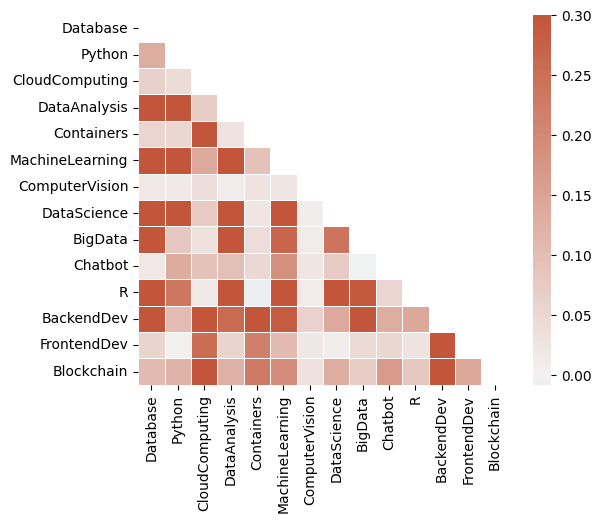

In [21]:
corr = features.cov()
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,square=True,center=0,linewidths=.5)
plt.show()

In [22]:
r = []
for n in range(1,15):
    pca = PCA(n_components=n)
    pca.fit(features)
    r.append(pca.explained_variance_ratio_.sum())
r

[0.2875684338769927,
 0.4630925644570195,
 0.5761339643675604,
 0.6487465627832457,
 0.7194878762997255,
 0.788210341031404,
 0.8429558465572913,
 0.8944445500368903,
 0.9272695591307615,
 0.9544658170614713,
 0.973357210316478,
 0.9870310843021108,
 0.9979163166617694,
 0.9999999999999999]

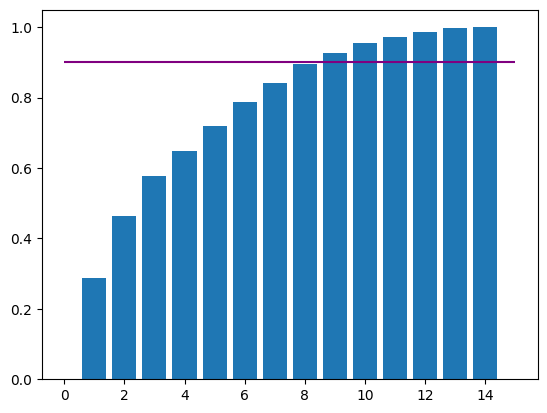

In [23]:
plt.bar(x=list(range(1,15)),height=r)
plt.hlines(y=0.9,xmax=15.0,xmin=0.0,colors='purple')
plt.show()

In [24]:
pca = PCA(n_components=9)
features_red = pca.fit_transform(features)
merged_pca_df = user_ids.join(pd.DataFrame(features_red)).reset_index()
merged_pca_df.rename(columns={0:'PC0',1:'PC1',2:'PC2',3:'PC3',4:'PC4',5:'PC5',6:'PC6',7:'PC7',8:'PC8'},inplace=True)
merged_pca_df

,index,user,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0,2,17.772494,0.200681,1.730609,2.567359,-3.825814,2.707154,0.681042,2.312613,0.868272
1,1,4,7.145199,-2.847481,2.358636,-0.576654,0.398803,-0.134533,0.549769,0.469033,0.033405
2,2,5,11.363270,1.873619,-1.522077,1.076144,-1.711688,0.883212,1.677582,2.937669,2.097639
3,3,7,-1.834033,-0.277462,0.564905,0.053470,-0.064440,0.165757,0.030956,0.039519,0.210887
4,4,8,-1.049125,-0.684767,1.072765,0.006371,-0.005695,0.118686,0.118559,0.559292,0.186379
...,...,...,...,...,...,...,...,...,...,...,...
33896,33896,2102054,0.633824,0.108815,-0.388871,-0.122665,-0.098364,0.358333,1.752049,1.486542,-0.523600
33897,33897,2102356,-2.095339,0.135058,0.244727,-0.088185,0.025081,0.183641,0.046413,0.191709,0.260437
33898,33898,2102680,0.625943,-0.547167,-1.692824,-0.630589,0.166632,0.676244,-0.055100,0.582091,1.703193
33899,33899,2102983,-2.036832,-0.153534,0.162852,0.082651,-0.126419,0.255109,0.072496,0.113750,0.622900


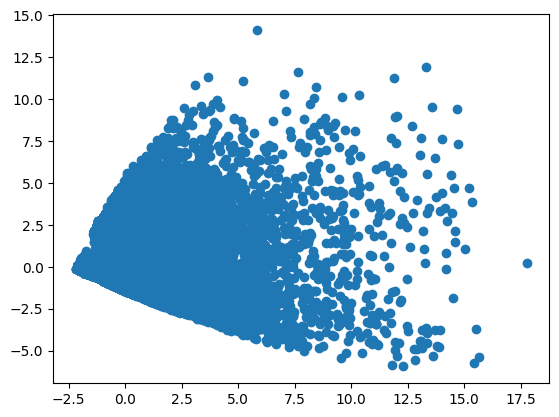

In [25]:
plt.scatter(features_red[:,0],features_red[:,1])

In [26]:
merged_pca_df.reset_index(drop=True,inplace=True)

In [27]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(merged_pca_df)

array([4, 4, 4, ..., 8, 8, 8])

In [28]:
clustered_users = user_ids.join(pd.DataFrame(km.labels_))

In [29]:
test_user_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
test_users_df = pd.read_csv(test_user_url)
test_users_df

,user,item,rating
0,1502801,RP0105EN,3.0
1,1609720,CNSC02EN,2.0
2,1347188,CO0301EN,3.0
3,755067,ML0103EN,3.0
4,538595,BD0115EN,3.0
...,...,...,...
9397,1385217,EE0101EN,3.0
9398,1864644,DA0101EN,3.0
9399,435858,TMP0105EN,3.0
9400,1888188,DB0101EN,3.0


In [30]:
test_users_df = test_users_df[['user','item']]
labelled = pd.merge(test_users_df,cluster_df,left_on='user',right_on='user')
labelled.rename(columns={0:'cluster'},inplace=True)
labelled

,user,item,cluster
0,1502801,RP0105EN,7
1,1502801,BD0131EN,7
2,1502801,BD0212EN,7
3,1502801,BD0115EN,7
4,1502801,BD0211EN,7
...,...,...,...
9397,630511,BD0121EN,16
9398,630511,SC0101EN,16
9399,630511,BD0111EN,16
9400,630511,BD0115EN,16


In [31]:
courses_clusters = labelled[['item','cluster']]
courses_clusters['count'] = [1] * len(courses_clusters)
courses_clusters = courses_clusters.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()
courses_clusters

,cluster,item,enrollments
0,0,BC0101EN,17
1,0,BC0201EN,4
2,0,BD0101EN,21
3,0,BD0111EN,11
4,0,BD0115EN,1
...,...,...,...
1218,19,SW0201EN,1
1219,19,TA0105,1
1220,19,TA0105EN,5
1221,19,TA0106EN,1


In [32]:
courses_clusters[courses_clusters['item']=='BC0201EN']

,cluster,item,enrollments
1,0,BC0201EN,4
120,2,BC0201EN,2
188,3,BC0201EN,3
249,4,BC0201EN,1
314,5,BC0201EN,17
414,6,BC0201EN,1
534,8,BC0201EN,1
655,11,BC0201EN,3
710,12,BC0201EN,2
783,13,BC0201EN,28


In [33]:
processed = pd.read_csv('./data/course_processed.csv')
processed

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...
...,...,...,...
302,excourse89,javascript jquery and json,in this course we ll look at the javascript l...
303,excourse90,programming foundations with javascript html ...,learn foundational programming concepts e g ...
304,excourse91,front end web development with react,this course explores javascript based front en...
305,excourse92,introduction to web development,this course is designed to start you on a path...


In [50]:
course_ids = pd.DataFrame(processed.loc[:,"COURSE_ID"])

In [51]:
sim_df = pd.read_csv('./data/sim.csv')

In [91]:
pca = PCA(n_components=14)
features_red = pca.fit_transform(sim_df)
merged = course_ids.join(pd.DataFrame(features_red)).reset_index().drop('index',axis=1)

In [92]:
merged

,COURSE_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ML0201EN,-0.687675,-0.099087,0.102062,-0.069048,-0.383736,-0.029912,-0.279525,0.165830,0.148561,0.039118,0.511304,0.470377,0.213440,-0.150415
1,ML0122EN,-0.481107,1.224940,-0.075933,0.187879,-0.270532,-0.069114,0.051716,0.173586,0.269973,0.124606,-0.054398,0.045735,-0.081227,-0.267919
2,GPXX0ZG0EN,-1.391842,-0.603609,-0.578082,0.733493,0.204340,0.070078,0.370010,-0.058460,0.351515,-0.013193,-0.137719,0.078479,0.345565,0.151004
3,RP0105EN,2.086723,-0.444959,-0.146464,0.111447,-0.237080,-0.515266,0.142725,-0.452567,-0.524734,0.200705,0.042049,-0.305512,0.108029,-0.015844
4,GPXX0Z2PEN,-1.456976,-0.315143,-0.203836,-0.168021,-0.166922,0.111921,0.035533,0.496816,-0.167485,0.151649,0.261420,-0.199076,0.125653,0.115551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,excourse89,-0.641550,-0.092232,0.051701,-0.298516,0.174746,-0.076948,-0.006033,0.222919,-0.078279,0.028329,-0.002144,0.016046,0.132079,-0.130400
303,excourse90,-0.836075,-0.048648,-0.055225,0.143965,0.639179,-0.001604,-0.266857,0.333298,-0.324738,-0.109944,-0.016188,0.196951,0.334789,-0.246243
304,excourse91,-0.702748,0.097260,0.173550,-0.033911,0.571591,-0.137285,0.047744,0.453518,0.124610,-0.034418,0.154709,-0.014837,0.076386,-0.047744
305,excourse92,-0.762911,0.082124,0.177369,-0.184500,0.554962,-0.068804,0.062985,0.470004,-0.430701,-0.123545,-0.177843,0.265093,0.253353,-0.182505


In [93]:
pc_rename = {i:f'PC{i}' for i in range(len(merged.columns)-1)}
pc_rename

{0: 'PC0',
 1: 'PC1',
 2: 'PC2',
 3: 'PC3',
 4: 'PC4',
 5: 'PC5',
 6: 'PC6',
 7: 'PC7',
 8: 'PC8',
 9: 'PC9',
 10: 'PC10',
 11: 'PC11',
 12: 'PC12',
 13: 'PC13'}

In [94]:
merged.rename(columns=pc_rename,inplace=True)
merged

,COURSE_ID,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,ML0201EN,-0.687675,-0.099087,0.102062,-0.069048,-0.383736,-0.029912,-0.279525,0.165830,0.148561,0.039118,0.511304,0.470377,0.213440,-0.150415
1,ML0122EN,-0.481107,1.224940,-0.075933,0.187879,-0.270532,-0.069114,0.051716,0.173586,0.269973,0.124606,-0.054398,0.045735,-0.081227,-0.267919
2,GPXX0ZG0EN,-1.391842,-0.603609,-0.578082,0.733493,0.204340,0.070078,0.370010,-0.058460,0.351515,-0.013193,-0.137719,0.078479,0.345565,0.151004
3,RP0105EN,2.086723,-0.444959,-0.146464,0.111447,-0.237080,-0.515266,0.142725,-0.452567,-0.524734,0.200705,0.042049,-0.305512,0.108029,-0.015844
4,GPXX0Z2PEN,-1.456976,-0.315143,-0.203836,-0.168021,-0.166922,0.111921,0.035533,0.496816,-0.167485,0.151649,0.261420,-0.199076,0.125653,0.115551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,excourse89,-0.641550,-0.092232,0.051701,-0.298516,0.174746,-0.076948,-0.006033,0.222919,-0.078279,0.028329,-0.002144,0.016046,0.132079,-0.130400
303,excourse90,-0.836075,-0.048648,-0.055225,0.143965,0.639179,-0.001604,-0.266857,0.333298,-0.324738,-0.109944,-0.016188,0.196951,0.334789,-0.246243
304,excourse91,-0.702748,0.097260,0.173550,-0.033911,0.571591,-0.137285,0.047744,0.453518,0.124610,-0.034418,0.154709,-0.014837,0.076386,-0.047744
305,excourse92,-0.762911,0.082124,0.177369,-0.184500,0.554962,-0.068804,0.062985,0.470004,-0.430701,-0.123545,-0.177843,0.265093,0.253353,-0.182505


In [58]:
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(features_red)

C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [72]:
merged.iloc[:,2:]

,PC0,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.687675,-0.099087,0.102062,-0.069048,-0.383736,-0.029912,-0.279525
1,-0.481107,1.224940,-0.075933,0.187879,-0.270532,-0.069114,0.051716
2,-1.391842,-0.603609,-0.578082,0.733493,0.204340,0.070078,0.370010
3,2.086723,-0.444959,-0.146464,0.111447,-0.237080,-0.515266,0.142725
4,-1.456976,-0.315143,-0.203836,-0.168021,-0.166922,0.111921,0.035533
...,...,...,...,...,...,...,...
302,-0.641550,-0.092232,0.051701,-0.298516,0.174746,-0.076948,-0.006033
303,-0.836075,-0.048648,-0.055225,0.143965,0.639179,-0.001604,-0.266857
304,-0.702748,0.097260,0.173550,-0.033911,0.571591,-0.137285,0.047744
305,-0.762911,0.082124,0.177369,-0.184500,0.554962,-0.068804,0.062985


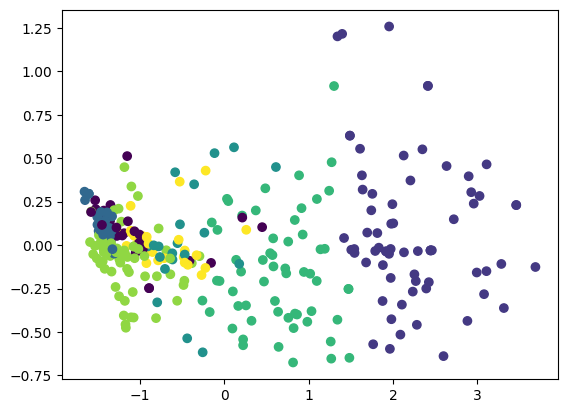

In [62]:
plt.scatter(merged.loc[:,'PC0'],merged.loc[:,'PC5'],c=clusters)

In [64]:
pd.set_option('display.max_colwidth', None)
joined = processed.join(pd.DataFrame(clusters)).reset_index().drop('DESCRIPTION',axis=1)


In [71]:
joined[joined[0]==6]

,index,COURSE_ID,TITLE,0
1,1,ML0122EN,accelerating deep learning with gpu,6
24,24,BENTEST4,ai for everyone master the basics,6
26,26,PA0103EN,predicting customer satisfaction,6
30,30,PA0107EN,predicting financial performance of a company,6
51,51,DW0101EN,introduction to machine learning with sound,6
61,61,ML0111EN,machine learning with apache systemml,6
65,65,GPXX04XJEN,advanced machine deep learning for spam classification task,6
90,90,AI0111EN,game playing ai with swift for tensorflow s4tf,6
118,118,GPXX0XENEN,playing tictactoe with reinforcement learning and openai gym,6
142,142,ML0115EN,deep learning 101,6


In [42]:
bows_df = pd.read_csv('./data/courses_bows.csv')
bows_df = bows_df[['doc_id', 'token', 'bow']]

In [43]:
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'

    merged = pd.concat([base, compare], ignore_index=True)

    pivot_table = merged.pivot_table(index=['doc_id', 'type'], columns='token', fill_value=0)

    pivot_table = pivot_table.reset_index()

    pivot_table.columns = pivot_table.columns.droplevel(0)

    pivot_table = pivot_table.rename_axis(columns=None)
    pivot_table[pivot_table.columns[2:]] = pivot_table.iloc[:,2:].astype('float32')
    return pivot_table

In [44]:

course1 = bows_df[bows_df['doc_id'] == 'ML0151EN']
course2 = bows_df[bows_df['doc_id'] == 'ML0101ENv3']

bow_vectors = pivot_two_bows(course1, course2)
bow_vectors

,,,approachable,basics,beneficial,comparison,course,dives,free,future,...,relates,started,statistical,supervised,tool,tools,trends,unsupervised,using,vs
0,ML0101ENv3,compare,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,ML0151EN,base,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [45]:
from scipy.spatial.distance import cosine


In [46]:
# s = []
# for j in processed.iloc[:,0]:
#     sims={}
#     for i in processed.iloc[:100,0]:
#         base = bows_df[bows_df['doc_id'] == j]
#         comparedoc = bows_df[bows_df['doc_id'] == i]
#         bow_vectors = pivot_two_bows(base, comparedoc)
#         similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
#         sims[i]=similarity
#     s.append(sims)

In [47]:
sim = pd.DataFrame(s)

In [48]:
#sim.to_csv('./data/similarity.csv',index=False)